In [ ]:
import yfinance as yf
ticker_symbol = "DX-Y.NYB"
ticker = yf.Ticker(ticker_symbol)
df = ticker.history(period="5y").reset_index(drop= False)
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999,0,0.0,0.0
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003,0,0.0,0.0
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003,0,0.0,0.0
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000,0,0.0,0.0
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001,0,0.0,0.0
...,...,...,...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999,0,0.0,0.0
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003,0,0.0,0.0
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003,0,0.0,0.0
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001,0,0.0,0.0


In [ ]:
dff=df.drop(columns=["Volume","Dividends","Stock Splits"])
dff

,Date,Open,High,Low,Close
0,2020-11-05 00:00:00-05:00,93.339996,93.550003,92.489998,92.529999
1,2020-11-06 00:00:00-05:00,92.570000,92.820000,92.180000,92.230003
2,2020-11-09 00:00:00-05:00,92.239998,92.959999,92.129997,92.730003
3,2020-11-10 00:00:00-05:00,92.760002,92.970001,92.599998,92.750000
4,2020-11-11 00:00:00-05:00,92.699997,93.209999,92.610001,93.040001
...,...,...,...,...,...
1253,2025-10-30 00:00:00-04:00,99.139999,99.720001,98.919998,99.529999
1254,2025-10-31 00:00:00-04:00,99.489998,99.839996,99.419998,99.800003
1255,2025-11-03 00:00:00-05:00,99.750000,99.989998,99.709999,99.870003
1256,2025-11-04 00:00:00-05:00,99.980003,100.260002,99.739998,100.220001


In [ ]:
import pandas as pd
import plotly.express as px

fig = px.line(dff, x="Date", y=['Open', 'High', 'Low', 'Close'], title='Τιμή Δολαρίου')
fig.show()

Με βάση το παραπάνω γράφημα, οι χρονοσειρές είναι μη στατικές. Αυτο φαίνεται καθώς υπάρχει αυξητική τάση μέχρι τον Οκτώβριο του 2022, ενώ έπειτα πτωτική τάση. Επίσης και οι διακυμάνσεις μεταβάλονται με το χρόνο.

Αν εκπαιδεύσουμε έναν Regressor σε μη στατικές χρονοσειρές ενδέχεται να παρουσιάσει χαμηλή γενίκευση και αναξιόπιστες προβλέψεις επειδή ο μέσος και η διακύμανση μεταβάλλονται. Στην περίπτωσή μας, οι τιμές των μεταβλητών παρουσιάζουν τάσεις και εποχικότητα, οπότε το μοντέλο μπορεί μαθαίνει αυτές τις συγκεκριμένες τάσεις του παρελθόντος χωρίς να μπορεί να τις προβλέψει σωστά στο μέλλον αν αλλάξει η συμπεριφορά της αγοράς. Άρα υπάρχει κίνδυνος overfitting και μειωμένης προβλεπτικής ακρίβειας σε νέα δεδομένα.

Από το γράφημα φαίνεται ότι το δολάριο μεταξύ Ιουνίου και Ιουλίου του 2025 παρουσιάζει πτωτική τάση. Αυτό έρρχεται σε συμφωνία με την απόφαση της Αμερικής να αυξήσει τους τελωνειακούς δασμούς.

Η πρόβλεψη της τιμής close του δολαρίου για την επόμενη μέρα μόνο γνωρίζοντας αυτές τις μεταβλητές δεν είναι δυνατή, καθώς η σχέση μεταξύ αυτών των μεταβλητών είναι μη γραμμική, η χρονοσειρά είναι μη στατική και επηρεάζεται από πολλούς εξωτερικούς παράγοντες όπως επιτόκια, οικονομικά νέα και γεωπολιτικές εξελίξεις.

Δεν έχει νόημα να γίνει τυχαίος διαχωρισμός των δεδομένων σε train–test όταν πρόκειται για χρονοσειρές. Αυτό συμβαίνει γιατί τα δεδομένα έχουν χρονική εξάρτηση, δηλαδή οι τιμές του παρελθόντος επηρεάζουν αυτές του μέλλοντος. Αν γίνει τυχαία ανάμειξη, το μοντέλο θα εκπαιδευτεί σε μελλοντικά δεδομένα και αυτό μπορεί να οδηγήσει σε μη ρεαλιστικά αποτελέσματα. Αντί για τυχαίο διαχωρισμό, πρέπει να γίνει χρονικά διατεταγμένος διαχωρισμός, όπου το train set περιλαμβάνει παλαιότερα δεδομένα και το test set πιο πρόσφατα, ώστε η αξιολόγηση να αντικατοπτρίζει πραγματικές συνθήκες πρόβλεψης.

In [ ]:
train_df = dff[dff['Date'].dt.year < 2024].copy()
test_df = dff[dff['Date'].dt.year == 2024].copy()

train_df = train_df.drop(columns=['Date'])
test_df = test_df.drop(columns=['Date'])

print("Train shape:", train_df.shape)
print("Test shape:", test_df.shape)
train_df.head()

Train shape: (792, 4)
Test shape: (252, 4)


,Open,High,Low,Close
0,93.339996,93.550003,92.489998,92.529999
1,92.570000,92.820000,92.180000,92.230003
2,92.239998,92.959999,92.129997,92.730003
3,92.760002,92.970001,92.599998,92.750000
4,92.699997,93.209999,92.610001,93.040001


In [ ]:
import numpy as np
def create_timeframes(data_df, n):
    timeframes = []
    timeframe_targets = []
    data_array = data_df.to_numpy()

    for i in range(data_df.shape[0] - n + 1):
        end = i + n
        timeframes.append(data_array[i: end])
        timeframe_targets.append(end)

    return np.array(timeframes), np.array(timeframe_targets)

Όταν θέλουμε να προβλέψουμε την επόμενη ημέρα, το μέγεθος του timeframe N πρέπει να είναι σχετικά μικρό, καθώς οι πιο πρόσφατες τιμές έχουν μεγαλύτερη σημασία για τη βραχυπρόθεσμη πρόβλεψη. Αν αντίθετα θέλουμε να προβλέψουμε σε πιο μακρινό ορίζοντα, όπως έναν μήνα, τότε είναι προτιμότερο να χρησιμοποιήσουμε μεγαλύτερο N, ώστε τα timeframes να αποτυπώνουν τη συνολική τάση και τα μοτίβα των προηγούμενων ημερών.

In [ ]:
x_train, y_train = create_timeframes(train_df, 5)
x_test, y_test = create_timeframes(test_df, 5)

In [ ]:
x_train = x_train.reshape(x_train.shape[0], 20)
x_test = x_test.reshape(x_test.shape[0], 20)


print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)
print(x_train[0])

(788, 20) (788,)
(248, 20) (248,)
[93.33999634 93.55000305 92.48999786 92.52999878 92.56999969 92.81999969
 92.18000031 92.23000336 92.23999786 92.95999908 92.12999725 92.73000336
 92.76000214 92.97000122 92.59999847 92.75       92.69999695 93.20999908
 92.61000061 93.04000092]


In [ ]:
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor, StackingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error
import matplotlib.pyplot as plt

In [ ]:
lr = LinearRegression()
lr.fit(x_train, y_train)
y_train_lr = lr.predict(x_train)
y_test_lr = lr.predict(x_test)
mae_train_lr = mean_absolute_error(y_train, y_train_lr)
mae_test_lr = mean_absolute_error(y_test, y_test_lr)

rf = RandomForestRegressor()
rf.fit(x_train, y_train)
y_train_rf = rf.predict(x_train)
y_test_rf = rf.predict(x_test)
mae_train_rf = mean_absolute_error(y_train, y_train_rf)
mae_test_rf = mean_absolute_error(y_test, y_test_rf)

bag = BaggingRegressor(estimator=LinearRegression())
bag.fit(x_train, y_train)
y_train_bag = bag.predict(x_train)
y_test_bag = bag.predict(x_test)
mae_train_bag = mean_absolute_error(y_train, y_train_bag)
mae_test_bag = mean_absolute_error(y_test, y_test_bag)

blr = BayesianRidge()
blr.fit(x_train, y_train)
y_train_blr = blr.predict(x_train)
y_test_blr = blr.predict(x_test)
mae_train_blr = mean_absolute_error(y_train, y_train_blr)
mae_test_blr = mean_absolute_error(y_test, y_test_blr)

stack = StackingRegressor(
    estimators=[('lr', LinearRegression()), ('dt', DecisionTreeRegressor())],
    final_estimator=LinearRegression())
stack.fit(x_train, y_train)
y_train_stack = stack.predict(x_train)
y_test_stack = stack.predict(x_test)
mae_train_stack = mean_absolute_error(y_train, y_train_stack)
mae_test_stack = mean_absolute_error(y_test, y_test_stack)


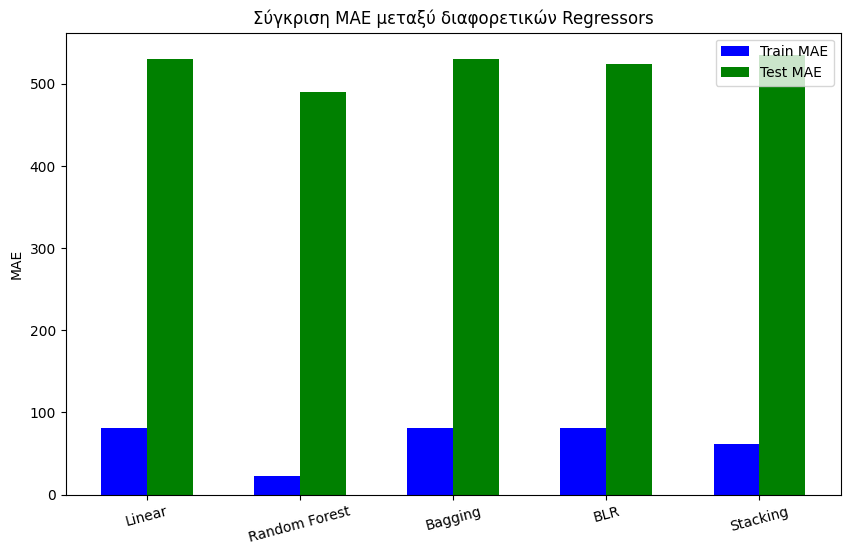

In [ ]:
models = ['Linear', 'Random Forest', 'Bagging', 'BLR', 'Stacking']
train_mae = [mae_train_lr, mae_train_rf, mae_train_bag, mae_train_blr, mae_train_stack]
test_mae = [mae_test_lr, mae_test_rf, mae_test_bag, mae_test_blr, mae_test_stack]

x = np.arange(len(models))
plt.figure(figsize=(10,6))
plt.bar(x - 0.15, train_mae, width=0.3, color='blue', label='Train MAE')
plt.bar(x + 0.15, test_mae, width=0.3, color='green', label='Test MAE')
plt.xticks(x, models, rotation=15)
plt.ylabel('MAE')
plt.title('Σύγκριση MAE μεταξύ Regressors')
plt.legend()
plt.show()

Τα μοντέλα που χρησιμοποιήθηκαν είναι διαφορετικοί τύποι Regressors. Το Linear Regression προβλέπει την μεταβλητή y ως γραμμικό συνδυασμό των μεταβλητών x. Tο Random Forest χρησιμοποιεί πολλαπλά δέντρα απόφασης και παίρνει τον μέσο όρο των προβλέψεών τους. O Bagging Regressor εκπαιδεύει πολλά μοντέλα Linear Regression σε τυχαία υποσύνολα των δεδομένων και συνδυάζει τις προβλέψεις τους. Το Bayesian Linear Regression είναι παρόμοιο με το Linear Regression αλλά ενσωματώνει αβεβαιότητα στις παραμέτρους του. Τέλος, το Stacking Regressor συνδυάζει προβλέψεις από διαφορετικά μοντέλα,όπως για παράδειγμα Linear και Decision Tree.